<a href="https://colab.research.google.com/github/urenajose/Json_Excel_SQL_Python/blob/main/Json_Wrangle_Explore_Export.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import pandas as pd
import matplotlib as plt
from matplotlib import figure
import seaborn as sns
from sqlalchemy import create_engine

In [81]:
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 12)

In [82]:
df = pd.read_json("https://raw.githubusercontent.com/urenajose/Json_Excel_SQL_Python/main/dummy_data.json",orient='split')
display(df.head(5),
df.tail(5))

,First Name,Last Name,Race_Origin,State,Code,Amount,Age,Date,Contacted,Year,Month,Sex
0,Sophia,Garcia,Hispanic/Latino,West Virginia,SP533768092S,181.82,48,2021-03-11,7,2021,3,Female
1,Noah,Lopez,Hispanic/Latino,Kentucky,VJ9014011939D,823.51,38,2021-02-07,8,2021,2,Male
2,Alexander,Jones,Black,Oklahoma,CW7203697017Y,840.77,33,2021-05-16,9,2021,5,Male
3,Lucas,Hernandez,Hispanic/Latino,South Carolina,QC9409763261D,711.01,24,2020-12-31,2,2020,12,Male
4,Elijah,Thomas,White,Washington,WA6097209526N,914.45,73,2021-02-09,4,2021,2,Male


,First Name,Last Name,Race_Origin,State,Code,Amount,Age,Date,Contacted,Year,Month,Sex
7995,Liam,Taylor,White,New Hampshire,KD9767312312W,692.94,25,2021-03-22,8,2021,3,Male
7996,Oliver,Miller,White,Kentucky,ZM1396056495D,777.73,33,2021-04-06,7,2021,4,Male
7997,Emma,Rodriguez,Hispanic/Latino,Rhode Island,NU8340557455A,669.31,18,2021-06-29,7,2021,6,Female
7998,Oliver,Brown,White,Alabama,YG6171691689K,335.00,64,2021-06-12,4,2021,6,Male
7999,Sophia,Anderson,White,Oklahoma,QV8858820407S,597.95,18,2021-01-02,8,2021,1,Female


In [83]:
New_England = "Connecticut, Maine, Massachusetts, New Hampshire, Rhode Island, Vermont".split(", ")
Mid_Atlantic = "New Jersey, New York, Pennsylvania".split(", ")
East_North_Central = "Illinois, Indiana, Michigan, Ohio, Wisconsin".split(", ")
West_North_Central = "(Iowa, Kansas, Minnesota, Missouri, Nebraska, North Dakota, South Dakota)".replace("(","").replace(")","").split(", ")
South_Atlantic = "(Delaware, Florida, Georgia, Maryland, North Carolina, South Carolina, Virginia, District of Columbia, West Virginia)".replace("(","").replace(")","").split(", ")
East_South_Central = "(Alabama, Kentucky, Mississippi, Tennessee)".replace("(","").replace(")","").split(", ")
West_South_Central = "(Arkansas, Louisiana, Oklahoma, Texas)".replace("(","").replace(")","").split(", ")
Mountain = "(Arizona, Colorado, Idaho, Montana, Nevada, New Mexico, Utah, Wyoming)".replace("(","").replace(")","").split(", ")
Pacific = "(Alaska, California, Hawaii, Oregon, Washington)".replace("(","").replace(")","").split(", ")
States_DC = New_England+Mid_Atlantic+East_North_Central+West_North_Central+South_Atlantic+East_South_Central+West_South_Central+Mountain+Pacific
US_Territories = ['American Samoa',
 'Guam',
 'Minor Outlying Islands',
 'Northern Mariana Islands',
 'Puerto Rico',
 'U.S. Virgin Islands']

In [84]:
# Renames State column to State/Territory
df.rename(columns={"State":"State/Territory"},inplace=True)

In [85]:
df.head()

,First Name,Last Name,Race_Origin,State/Territory,Code,Amount,Age,Date,Contacted,Year,Month,Sex
0,Sophia,Garcia,Hispanic/Latino,West Virginia,SP533768092S,181.82,48,2021-03-11,7,2021,3,Female
1,Noah,Lopez,Hispanic/Latino,Kentucky,VJ9014011939D,823.51,38,2021-02-07,8,2021,2,Male
2,Alexander,Jones,Black,Oklahoma,CW7203697017Y,840.77,33,2021-05-16,9,2021,5,Male
3,Lucas,Hernandez,Hispanic/Latino,South Carolina,QC9409763261D,711.01,24,2020-12-31,2,2020,12,Male
4,Elijah,Thomas,White,Washington,WA6097209526N,914.45,73,2021-02-09,4,2021,2,Male


In [86]:
def census_regions(state):
  # Return the Census Region the States belongs to,
  # If Puerto Rico returns Puerto Rico, if a Other U.S. Territory
  if state in New_England+Mid_Atlantic:
    region = "Northeast"
  elif state in East_North_Central+West_North_Central:
    region = "Midwest"
  elif state in South_Atlantic+East_South_Central+West_South_Central:
    region = "South"
  elif state in Mountain+Pacific:
    region = "West"
  elif state == "Puerto Rico":
    region = "Puerto Rico"
  else:
    region = "U.S. Territory"
  return region
#add U.S. Region column to dataset
df["U.S. Region"] = df["State/Territory"].apply(lambda x: census_regions(x))
display(df.head(5))

,First Name,Last Name,Race_Origin,State/Territory,Code,Amount,...,Date,Contacted,Year,Month,Sex,U.S. Region
0,Sophia,Garcia,Hispanic/Latino,West Virginia,SP533768092S,181.82,...,2021-03-11,7,2021,3,Female,South
1,Noah,Lopez,Hispanic/Latino,Kentucky,VJ9014011939D,823.51,...,2021-02-07,8,2021,2,Male,South
2,Alexander,Jones,Black,Oklahoma,CW7203697017Y,840.77,...,2021-05-16,9,2021,5,Male,South
3,Lucas,Hernandez,Hispanic/Latino,South Carolina,QC9409763261D,711.01,...,2020-12-31,2,2020,12,Male,South
4,Elijah,Thomas,White,Washington,WA6097209526N,914.45,...,2021-02-09,4,2021,2,Male,West


In [87]:
# Female count by age groups
print("Number of Females and Males \n",df.Sex.value_counts())
print("\n")
print("Females age groups \n",pd.cut(df[df["Sex"]=="Female"].Age,3).value_counts())
print("\n")
print("Males age groups \n",pd.cut(df[df["Sex"]=="Male"].Age,3).value_counts())

Number of Females and Males 
 Female    4021
Male      3979
Name: Sex, dtype: int64


Females age groups 
 (17.919, 45.0]    2548
(45.0, 72.0]      1062
(72.0, 99.0]       411
Name: Age, dtype: int64


Males age groups 
 (17.919, 45.0]    2509
(45.0, 72.0]      1076
(72.0, 99.0]       394
Name: Age, dtype: int64


In [88]:
def age_group(age):
  # Return a age group name, given a integer 18 to infiniti
  if 18 <= age <= 29:
    group = "20s_Younger"
  elif 30 <= age <= 39:
    group = "30s"
  elif 40 <= age <= 49:
    group = "40s"
  elif 50 <= age <= 59:
    group = "Middle Age"
  else: 
    group = "Senior" # age >= 65:
  return group
# insert Age Group feature to Data set
df["Age Group"] = df["Age"].apply(lambda x: age_group(x))

In [89]:
df.shape

(8000, 14)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 0 to 7999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   First Name       8000 non-null   object        
 1   Last Name        8000 non-null   object        
 2   Race_Origin      8000 non-null   object        
 3   State/Territory  8000 non-null   object        
 4   Code             8000 non-null   object        
 5   Amount           8000 non-null   float64       
 6   Age              8000 non-null   int64         
 7   Date             8000 non-null   datetime64[ns]
 8   Contacted        8000 non-null   int64         
 9   Year             8000 non-null   int64         
 10  Month            8000 non-null   int64         
 11  Sex              8000 non-null   object        
 12  U.S. Region      8000 non-null   object        
 13  Age Group        8000 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(

In [91]:
df.describe()

,Amount,Age,Contacted,Year,Month
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,547.808939,42.102000,4.986875,2020.883625,5.262375
std,260.414262,20.583836,2.579784,0.320694,3.220960
min,100.530000,18.000000,1.000000,2020.000000,1.000000
25%,319.197500,25.000000,3.000000,2021.000000,3.000000
50%,547.665000,34.000000,5.000000,2021.000000,5.000000
75%,770.360000,58.000000,7.000000,2021.000000,7.000000
max,999.990000,99.000000,9.000000,2021.000000,12.000000


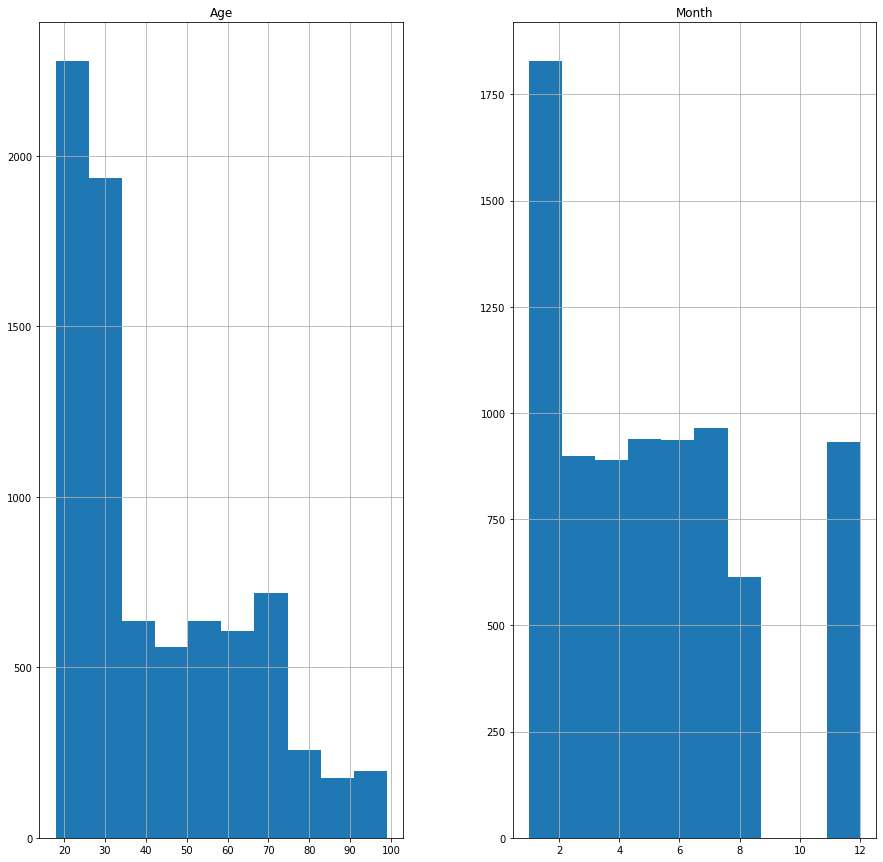

In [92]:
df[["Age","Month"]].hist(figsize=(15, 15));

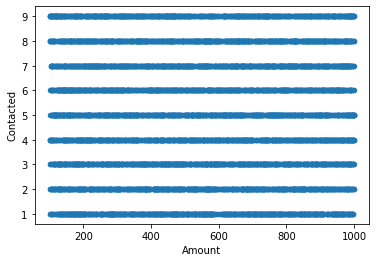

In [93]:
df.plot.scatter("Amount","Contacted");

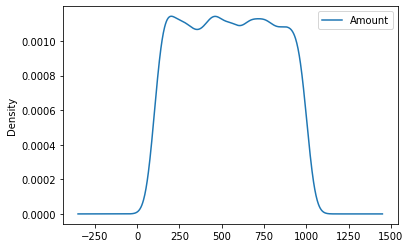

In [94]:
df[["Amount"]].plot.density();

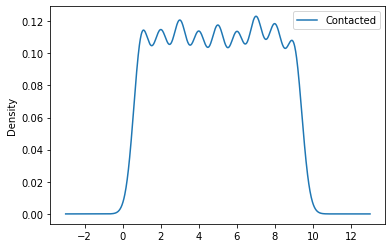

In [95]:
df[["Contacted"]].plot.density();

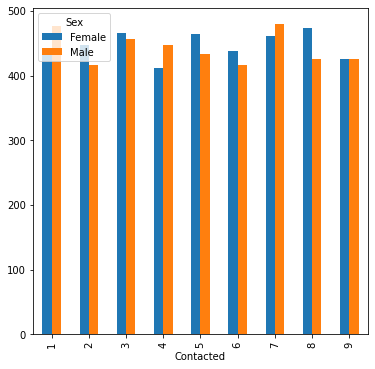

In [96]:
crosstab = pd.crosstab(df['Contacted'], df['Sex'])
crosstab.plot(figsize=(6,6),kind='bar')

In [97]:
df_State1 = df.groupby(["State/Territory"])[["Contacted","Amount"]].sum().sort_values(by=['Contacted'],ascending=False)
df_State1 = df_State1.reset_index()
df_State1.head(50)


,State/Territory,Contacted,Amount
0,Connecticut,914,94593.56
1,District of Columbia,883,95842.09
2,Minor Outlying Islands,823,87741.99
3,Delaware,812,93650.88
4,Florida,810,92159.49
5,Alaska,793,84664.01
6,Massachusetts,779,78242.57
7,Colorado,779,85709.04
8,Kansas,775,80482.54
9,New Jersey,771,82982.90


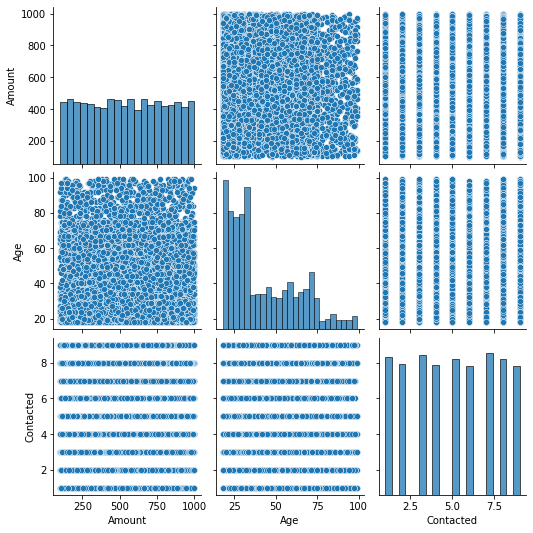

In [98]:
 sns.pairplot(df[["Amount","Age",'Contacted']])

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


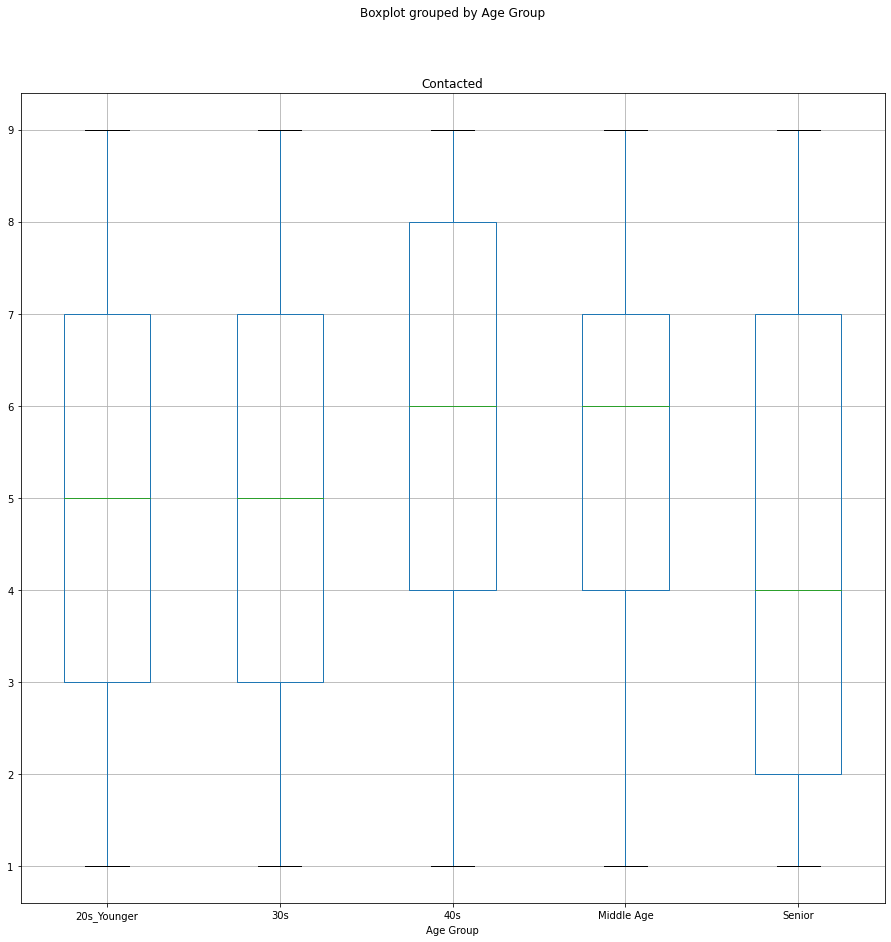

In [99]:
df[df["State/Territory"].isin(["Connecticut","Wyoming","Alabama","Puerto Rico"])].boxplot(column=['Contacted'],by="Age Group",figsize=(15,15));

In [102]:
engine = create_engine('sqlite:///dummy_data.db', echo=False)
df.to_sql("dummy_data", con=engine, if_exists='replace')
engine.execute("SELECT * FROM dummy_data").fetchall()
print("SQL .db file created or replace")

SQL .db file created or replace


In [104]:
# Creates separate excel files per Census Region, Puerto Rico and U.S. Territory
region_list = ["NorthEast","Midwest","South","West","Puerto Rico","U.S. Territory"]
for region in region_list:
  df[df["U.S. Region"]==region].to_excel(f'{region}.xlsx')

# Creates a excel file from complete dataset
  df.to_excel(f'All_DummyData.xlsx')
print("excel files created")

excel files created
